# K-mean

In [16]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv(r"C:\Users\ALMASRIA 4 COMP\Desktop\ML\Mall_Customers.csv")

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [19]:
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [20]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [21]:
from sklearn.preprocessing import LabelEncoder
df["Gender"] = LabelEncoder().fit(['Male', 'Female']).transform(df.Gender)

In [22]:
df.Gender

0      1
1      1
2      0
3      0
4      0
      ..
195    0
196    0
197    1
198    1
199    1
Name: Gender, Length: 200, dtype: int64

In [23]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [24]:
df.drop(["CustomerID"],axis='columns',inplace=True)

In [25]:
correlation = df.corr()

correlation

,Gender,Age,Annual Income (k$),Spending Score (1-100)
Gender,1.000000,0.060867,0.056410,-0.058109
Age,0.060867,1.000000,-0.012398,-0.327227
Annual Income (k$),0.056410,-0.012398,1.000000,0.009903
Spending Score (1-100),-0.058109,-0.327227,0.009903,1.000000


<Axes: >

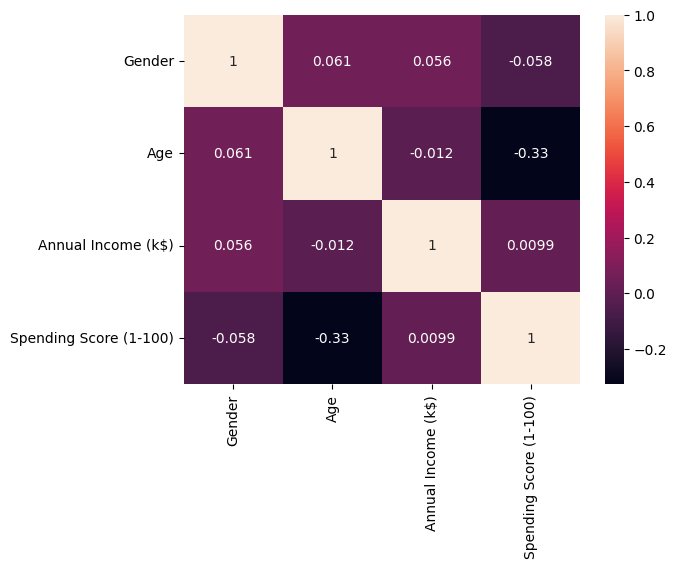

In [26]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)


Elbow method

In [27]:
from sklearn.cluster import KMeans

In [28]:
kmean_model = KMeans(n_clusters=7,init='random')
kmean_model.fit(X)
cp= kmean_model.cluster_centers_
print(kmean_model.inertia_)

15514.19313435103


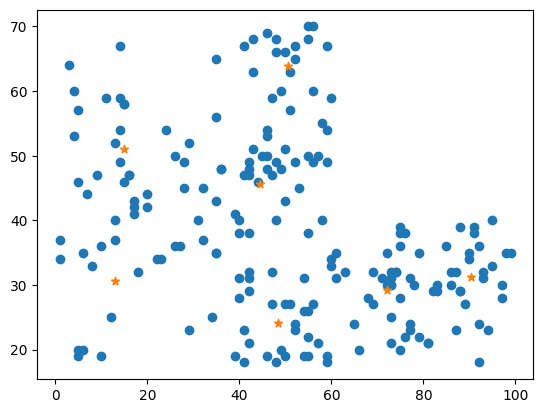

In [29]:
plt.scatter(X["Spending Score (1-100)"],X["Age"])
plt.scatter(cp[:,0],cp[:,1],marker='*')

In [30]:
X =df[["Spending Score (1-100)","Age"]]

In [31]:
Clustering_score= []
for i in range(1,11):
    kmean_model= KMeans(n_clusters =i, init= 'random', random_state=42) #  'k-means++' initialization
    kmean_model.fit(X)
    Clustering_score.append(kmean_model.inertia_)





In [32]:
print(Clustering_score)

[171535.50000000003, 75949.15601023019, 45840.67661610866, 28165.583566629342, 23839.262483341663, 19577.258914820988, 15514.19313435103, 13024.101653416452, 11823.563139557702, 10336.201780626783]


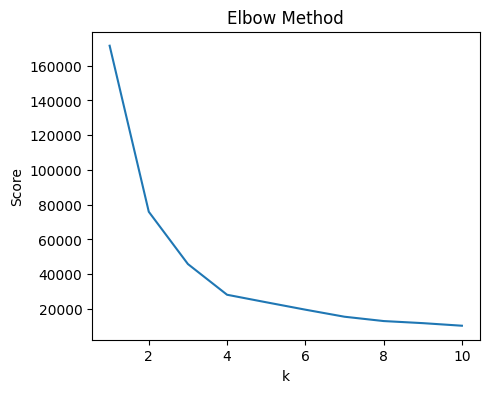

In [33]:
plt.figure(figsize=(5,4))
plt.plot(range(1,11),Clustering_score)
plt.title("Elbow Method")
plt.xlabel("k")
plt.ylabel("Score")
plt.show()

Text(0, 0.5, 'Clustering Score')

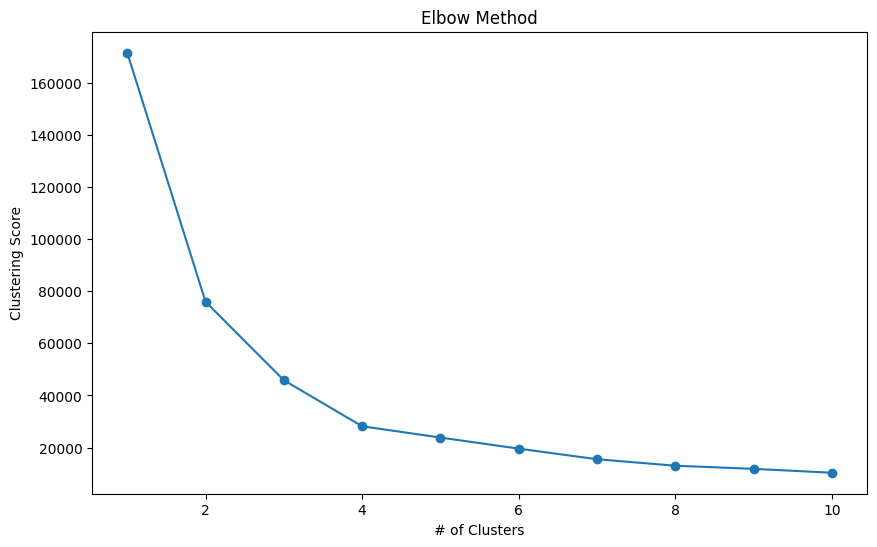

In [35]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11),Clustering_score)
plt.scatter(range(1,11),Clustering_score)
plt.title('Elbow Method')
plt.xlabel('# of Clusters')
plt.ylabel('Clustering Score')



In [38]:
kmean_model =KMeans(n_clusters = 3, init='k-means++', random_state=42)
kmean_model.fit(X)
kmean_model.score(X)



-45840.67661610867

Visualization

In [ ]:
from sklearn.preprocessing import StandardScaler